In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [136]:
df=pd.read_csv('../data/Insurance claims data.csv')
df

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [138]:
df.isna().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [139]:
df.drop_duplicates(inplace=True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [141]:
num_col=[]
str_col=[]

for col in df.columns:
    if df[col].dtype=='object':
        str_col.append(col)
    else:
        num_col.append(col)

print("Numerical Columns:", num_col)
print("Object Columns:", str_col)            

Numerical Columns: ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'airbags', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating', 'claim_status']
Object Columns: ['policy_id', 'region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


<Axes: xlabel='count', ylabel='claim_status'>

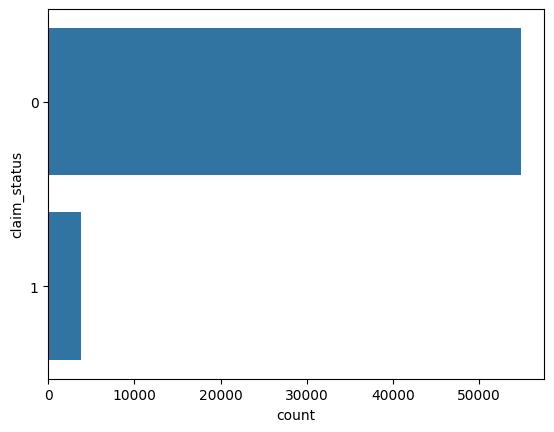

In [142]:
sns.countplot(data=df, y='claim_status')

<Axes: >

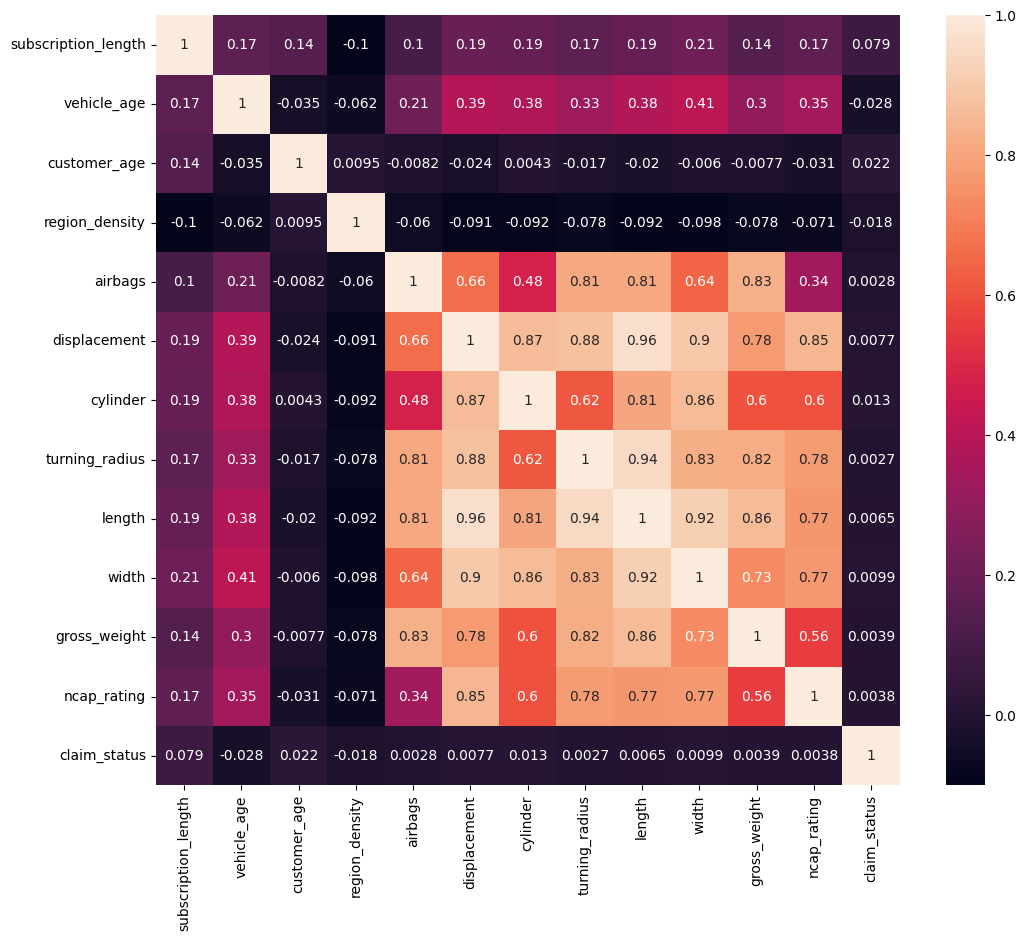

In [143]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [144]:
minority = df[df['claim_status'] == 1]
majority = df[df['claim_status'] == 0]
minority

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
12,POL050280,10.2,1.6,41,C2,27003,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
29,POL021346,10.9,2.0,41,C10,73430,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
76,POL044165,12.2,0.4,41,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,1
81,POL012008,11.1,1.0,57,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
84,POL043686,1.1,0.0,53,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58475,POL052302,0.4,1.4,36,C9,17804,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
58517,POL053069,0.9,1.8,37,C2,27003,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,1
58524,POL039299,2.2,0.6,37,C11,6108,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
58543,POL014364,11.7,1.2,51,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1


In [145]:
minority_oversample=resample(minority,replace=True,n_samples=len(majority),random_state=42)
minority_oversample

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
49350,POL055973,10.3,0.8,52,C8,8794,Utility,M10,CNG,85Nm@3000rpm,...,No,No,No,No,No,No,No,Yes,0,1
54396,POL044201,12.4,1.6,48,C3,4076,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
13313,POL052139,10.2,2.0,50,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
19865,POL057684,10.4,1.4,41,C13,5410,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
17144,POL041866,1.4,0.4,41,C11,6108,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,POL044783,11.6,0.2,54,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
36093,POL044451,11.3,1.0,61,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
54154,POL040484,7.7,0.0,49,C11,6108,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
48891,POL040274,11.2,1.0,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1


In [146]:
oversampled_data=pd.concat([majority,minority_oversample])
oversampled_data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,POL044783,11.6,0.2,54,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
36093,POL044451,11.3,1.0,61,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
54154,POL040484,7.7,0.0,49,C11,6108,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
48891,POL040274,11.2,1.0,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1


In [147]:
oversampled_data.claim_status.value_counts()

claim_status
0    54844
1    54844
Name: count, dtype: int64

### Doing predition on original data

In [148]:
labenc = LabelEncoder()

In [149]:
encoded_data = df.apply(lambda col: labenc.fit_transform(col) if col.dtype == 'object' else col)
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

model1=SVC()
model1.fit(X_train,y_train)

y_pred=model1.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     21924
           1       0.00      0.00      0.00      1513

    accuracy                           0.94     23437
   macro avg       0.47      0.50      0.48     23437
weighted avg       0.88      0.94      0.90     23437



/Users/akashmukherjee/Programming/Practise ML/Insurance Claim/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/akashmukherjee/Programming/Practise ML/Insurance Claim/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/akashmukherjee/Programming/Practise ML/Insurance Claim/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

### Doing prediciton on Oversampled Data

In [150]:
encoded_data = oversampled_data.apply(lambda col: labenc.fit_transform(col) if col.dtype == 'object' else col)

In [151]:
encoded_data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,45359,9.3,1.2,41,20,8794,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
1,16744,8.2,1.8,35,11,27003,3,10,1,2,...,0,1,1,1,1,1,1,1,4,0
2,7193,9.5,0.2,44,20,8794,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
3,18145,5.2,0.4,44,1,73430,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
4,49010,10.1,1.0,56,4,5410,2,6,1,3,...,0,1,1,1,0,0,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,44782,11.6,0.2,54,17,34738,1,9,0,6,...,0,1,1,1,0,0,1,1,2,1
36093,44450,11.3,1.0,61,17,34738,2,7,2,0,...,1,1,1,1,1,1,1,1,2,1
54154,40483,7.7,0.0,49,2,6108,0,0,0,5,...,0,0,0,1,0,0,0,1,0,1
48891,40273,11.2,1.0,44,20,8794,4,5,1,4,...,1,1,1,1,1,0,1,1,3,1


In [152]:
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

In [154]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)

y_pred=model2.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     21994
           1       0.98      1.00      0.99     21882

    accuracy                           0.99     43876
   macro avg       0.99      0.99      0.99     43876
weighted avg       0.99      0.99      0.99     43876



In [155]:
feature_importance = model2.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by feature importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
features_df.head(10)

,Feature,Importance
0,policy_id,0.258624
1,subscription_length,0.255261
3,customer_age,0.169156
2,vehicle_age,0.162536
4,region_code,0.065822
5,region_density,0.065559
7,model,0.001861
26,gross_weight,0.001809
24,length,0.001595
19,displacement,0.001592
